In [40]:
import requests
import json
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
data = requests.get("https://servicodados.ibge.gov.br/api/v3/agregados/9605/periodos/2022/variaveis/93?localidades=N6[3302403]&classificacao=86[all]")
data_json = data.json()

data_json

[{'id': '93',
  'variavel': 'População residente',
  'unidade': 'Pessoas',
  'resultados': [{'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'95251': 'Total'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '246391'}}]},
   {'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2776': 'Branca'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '92211'}}]},
   {'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2777': 'Preta'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '42838'}}]},
   {'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2778': 'A

In [42]:

result_dict = {}
for item in data_json[0]["resultados"]:
    color = list(item['classificacoes'][0]['categoria'].values())[0]
    qtd = list(item['series'][0]['serie'].values())[0]
    result_dict[color] = qtd

result_dict.pop("Total")

df_dados_cor_2022 = pd.DataFrame(list(result_dict.items()), columns=['Cor', 'Total'])
df_dados_cor_2022

,Cor,Total
0,Branca,92211
1,Preta,42838
2,Amarela,444
3,Parda,110556
4,Indígena,337


In [43]:
# Custom colors for the chart
chart_colors = ['#E6D1B1', '#1f1e1c', '#f7cd79', '#967f51', '#454128']

fig = px.pie(df_dados_cor_2022,values="Total",names="Cor",color_discrete_sequence=["#E6D1B1", "#1f1e1c", "#f7cd79", "#967f51", "#454128"],category_orders={"Cor": df_dados_cor_2022.index.tolist()})

fig

In [44]:
data = requests.get("https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2001|2002|2003|2004|2005|2006|2008|2009|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021/variaveis/9324?localidades=N6[3302403]")
data_json = data.json()

data_json

[{'id': '9324',
  'variavel': 'População residente estimada',
  'unidade': 'Pessoas',
  'resultados': [{'classificacoes': [],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2001': '136145',
       '2002': '140466',
       '2003': '144207',
       '2004': '152063',
       '2005': '156410',
       '2006': '160725',
       '2008': '188787',
       '2009': '194413',
       '2011': '212433',
       '2012': '217951',
       '2013': '224442',
       '2014': '229624',
       '2015': '234628',
       '2016': '239471',
       '2017': '244139',
       '2018': '251631',
       '2019': '256672',
       '2020': '261501',
       '2021': '266136'}}]}]}]

In [45]:
result_dict = {}

for item in data_json[0]["resultados"][0]["series"][0]["serie"].items():
    result_dict[item[0]] = int(item[1])

df_dados_pop = pd.DataFrame(list(result_dict.items()), columns=['Ano', 'Total'])
df_dados_pop

,Ano,Total
0,2001,136145
1,2002,140466
2,2003,144207
3,2004,152063
4,2005,156410
5,2006,160725
6,2008,188787
7,2009,194413
8,2011,212433
9,2012,217951


In [46]:
fig = px.bar(df_dados_pop, x='Ano', y='Total', title='Bar Chart for Total by Year')

fig

In [47]:
data = requests.get("https://servicodados.ibge.gov.br/api/v3/agregados/9606/periodos/2022/variaveis/93?localidades=N6[3302403]&classificacao=2[4,5]|287[93070,93084,93085,93086,93087,93088,93089,93090,93091,93092,93093,93094,93095,93096,93097,93098,49108,49109,60040,60041,6653]")
data_json = data.json()

data_json

[{'id': '93',
  'variavel': 'População residente',
  'unidade': 'Pessoas',
  'resultados': [{'classificacoes': [{'id': '2',
      'nome': 'Sexo',
      'categoria': {'4': 'Homens'}},
     {'id': '287', 'nome': 'Idade', 'categoria': {'93070': '0 a 4 anos'}},
     {'id': '86', 'nome': 'Cor ou raça', 'categoria': {'95251': 'Total'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '8326'}}]},
   {'classificacoes': [{'id': '2',
      'nome': 'Sexo',
      'categoria': {'4': 'Homens'}},
     {'id': '287', 'nome': 'Idade', 'categoria': {'93084': '5 a 9 anos'}},
     {'id': '86', 'nome': 'Cor ou raça', 'categoria': {'95251': 'Total'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '9514'}}]},
   {'classificacoes': [{'id': '2',
      'nome': 'Sexo',
      'categoria': {'4': 'Homens'}

In [48]:
rows = []
for resultado in data_json[0]["resultados"]:
    sexo = list(resultado['classificacoes'][0]['categoria'].values())[0]
    idade = list(resultado['classificacoes'][1]['categoria'].values())[0]
    quantidade = int(list(resultado['series'][0]['serie'].values())[0])
    rows.append([sexo, idade, quantidade])


df_dist_idade_sexo = pd.DataFrame(rows, columns=['Sexo', 'Idade', 'Quantidade'])

df_dist_idade_sexo

,Sexo,Idade,Quantidade
0,Homens,0 a 4 anos,8326
1,Homens,5 a 9 anos,9514
2,Homens,10 a 14 anos,8653
3,Homens,15 a 19 anos,8345
4,Homens,20 a 24 anos,8361
5,Homens,25 a 29 anos,8975
6,Homens,30 a 34 anos,9505
7,Homens,35 a 39 anos,11012
8,Homens,40 a 44 anos,10888
9,Homens,45 a 49 anos,8003


In [49]:
trace_male = go.Bar(
    y=df_dist_idade_sexo["Idade"],
    x=df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Homens"],
    orientation='h',
    name='Male',
    marker=dict(color='blue')
)

trace_female = go.Bar(
    y=df_dist_idade_sexo["Idade"],
    x=df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Mulheres"] * -1,  # Multiply by -1 to mirror the female bars
    orientation='h',
    name='Female',
    marker=dict(color='pink')
)

# Create layout
layout = go.Layout(
    title='Age Pyramid',
    barmode='overlay',  # Overlay male and female bars
    xaxis=dict(title='Population', range=[-max(max(df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Homens"]), max(df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Mulheres"])) * 1.1, max(max(df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Homens"]), max(df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Mulheres"])) * 1.1]),
    yaxis=dict(title='Age Group'),
)

# Create figure
fig = go.Figure(data=[trace_male, trace_female], layout=layout)

fig

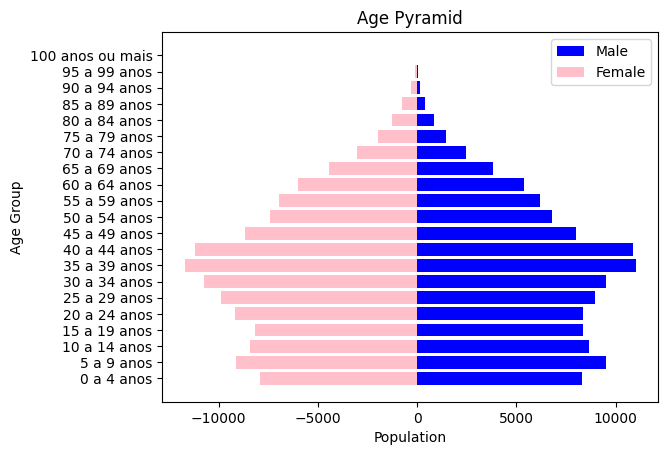

In [50]:
fig, ax = plt.subplots()

# Plot male and female populations
ax.barh(df_dist_idade_sexo["Idade"][df_dist_idade_sexo["Sexo"] == "Homens"], df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Homens"], color='blue', label='Male')
ax.barh(df_dist_idade_sexo["Idade"][df_dist_idade_sexo["Sexo"] == "Mulheres"], -df_dist_idade_sexo["Quantidade"][df_dist_idade_sexo["Sexo"] == "Mulheres"], color='pink', label='Female')  

# Set labels and title
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.set_title('Age Pyramid')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [51]:
#consulta CNPJ
data = requests.get("https://receitaws.com.br/v1/cnpj/05635291000299")
data_json = data.json()

data_json



{'abertura': '09/04/2003',
 'situacao': 'ATIVA',
 'tipo': 'FILIAL',
 'nome': 'BAKER HUGHES ENERGY TECHNOLOGY DO BRASIL LIMITADA',
 'porte': 'DEMAIS',
 'natureza_juridica': '206-2 - Sociedade Empresária Limitada',
 'atividade_principal': [{'code': '33.14-7-14',
   'text': 'Manutenção e reparação de máquinas e equipamentos para a prospecção e extração de petróleo'}],
 'atividades_secundarias': [{'code': '09.10-6-00',
   'text': 'Atividades de apoio à extração de petróleo e gás natural'},
  {'code': '28.51-8-00',
   'text': 'Fabricação de máquinas e equipamentos para a prospecção e extração de petróleo, peças e acessórios'},
  {'code': '33.21-0-00',
   'text': 'Instalação de máquinas e equipamentos industriais'},
  {'code': '46.19-2-00',
   'text': 'Representantes comerciais e agentes do comércio de mercadorias em geral não especializado'},
  {'code': '52.11-7-99',
   'text': 'Depósitos de mercadorias para terceiros, exceto armazéns gerais e guarda-móveis'},
  {'code': '62.02-3-00',
   't

In [52]:
data = {
    'Year': [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006],
    'Revenue (R$)': [
        258283504.04, 394501266.54, 293495326.33, 348671477.28, 491526473.38,
        466531575.52, 476924994.43, 410494180.33, 356017093.59, 294572486.39,
        406961370.68, 289542845.97, 320241924.75
    ]
}

royaltes_df = pd.DataFrame(data)
royaltes_df

,Year,Revenue (R$)
0,2018,2.582835e+08
1,2017,3.945013e+08
2,2016,2.934953e+08
3,2015,3.486715e+08
4,2014,4.915265e+08
5,2013,4.665316e+08
6,2012,4.769250e+08
7,2011,4.104942e+08
8,2010,3.560171e+08
9,2009,2.945725e+08


In [53]:
data = requests.get("https://servicodados.ibge.gov.br/api/v3/agregados/9606/periodos/2022/variaveis/93?localidades=N6[3302403]&classificacao=86[2776,2777,2778,2779,2780]|2[4,5]|287[93070,93084,93085,93086,93087,93088,93089,93090,93091,93092,93093,93094,93095,93096,93097,93098,49108,49109,60040,60041,6653]")
data_json = data.json()

data_json

[{'id': '93',
  'variavel': 'População residente',
  'unidade': 'Pessoas',
  'resultados': [{'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2776': 'Branca'}},
     {'id': '2', 'nome': 'Sexo', 'categoria': {'4': 'Homens'}},
     {'id': '287', 'nome': 'Idade', 'categoria': {'93070': '0 a 4 anos'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '3479'}}]},
   {'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2776': 'Branca'}},
     {'id': '2', 'nome': 'Sexo', 'categoria': {'4': 'Homens'}},
     {'id': '287', 'nome': 'Idade', 'categoria': {'93084': '5 a 9 anos'}}],
    'series': [{'localidade': {'id': '3302403',
       'nivel': {'id': 'N6', 'nome': 'Município'},
       'nome': 'Macaé (RJ)'},
      'serie': {'2022': '3440'}}]},
   {'classificacoes': [{'id': '86',
      'nome': 'Cor ou raça',
      'categoria': {'2776'

In [54]:
complete_population_df = pd.DataFrame(columns=["População","Cor","Sexo","Idade"])

for population_data in data_json[0]["resultados"]:
    cor = list(population_data["classificacoes"][0]["categoria"].items())[0][1]
    sexo = list(population_data["classificacoes"][1]["categoria"].items())[0][1]
    range_idade = list(population_data["classificacoes"][2]["categoria"].items())[0][1]
    populacao = list(population_data["series"][0]["serie"].items())[0][1]
    
    complete_population_df = pd.concat([complete_population_df,pd.DataFrame([{"População":populacao,"Cor":cor,"Sexo":sexo,"Idade":range_idade}])],ignore_index=True)
 
complete_population_df["População"] = complete_population_df["População"].replace("-","0")
complete_population_df["População"] = complete_population_df["População"].astype(int)
complete_population_df

,População,Cor,Sexo,Idade
0,3479,Branca,Homens,0 a 4 anos
1,3440,Branca,Homens,5 a 9 anos
2,2899,Branca,Homens,10 a 14 anos
3,2701,Branca,Homens,15 a 19 anos
4,2719,Branca,Homens,20 a 24 anos
...,...,...,...,...
205,1,Indígena,Mulheres,80 a 84 anos
206,1,Indígena,Mulheres,85 a 89 anos
207,0,Indígena,Mulheres,90 a 94 anos
208,0,Indígena,Mulheres,95 a 99 anos


In [56]:
px.sunburst(
    complete_population_df,
    path=['Cor', 'Sexo', 'Idade'],
    values='População',
    title='Grafico Solar da População',
    height=600,
    color_discrete_sequence=["#967f51", "#E6D1B1","#1f1e1c", "#f7cd79", "#454128"]#['rgb(140, 95, 6)','rgb(227, 203, 182)','rgb(51, 37, 10)','rgb(242, 180, 61)','rgb(117, 107, 16)']
)
